# From classification to regression: a smooth introduction to supervised ML for Regression

In supervised machine learning, we have input-output pairs in our dataset, where the input is a set of features (also known as predictors or independent variables) and the output is the target (also known as the dependent variable). The main difference between classification and regression is the type of target variable:

- Classification: The target variable is categorical, meaning it can take on a limited number of discrete values or classes (e.g., "spam" or "not spam").
- Regression: The target variable is continuous, meaning it can take on any real value within a given range (e.g., house prices, product sales, or temperatures).

In this workshop, we'll be working with a regression problem using Python, and we'll guide you through the process of building and evaluating different regression models. This will help you understand the key concepts and techniques, allowing you to apply them to real-world problems.

## 1. Load and explore the dataset

For this workshop, we'll be using the 'diamonds' dataset from seaborn, which contains information on diamond prices and their attributes, such as carat, cut, color, and clarity. Here is its information more in detail: 

* price: price in US dollars (\$326–\$18,823)
* carat: weight of the diamond (0.2–5.01)
* cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* color: diamond colour, from D (best) to J (worst)
* clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* x: length in mm (0–10.74)
* y: width in mm (0–58.9)
* z: depth in mm (0–31.8)
* depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43–79)
* table: width of top of diamond relative to widest point (43–95)

 Our goal will be to predict the price of a diamond based on these attributes. Let's start by loading the dataset and exploring its structure.

In [1]:
# import libraries
import seaborn as sns
import pandas as pd

# load dataset
diamonds = sns.load_dataset('diamonds')



To get a sense of the dataset, let's take a look at the first few rows using the head method:

In [2]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Let's check other information of the dataset:

In [3]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [4]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


let's visualize the relationship between the 'carat' column and the 'price' column using seaborn's scatterplot function:

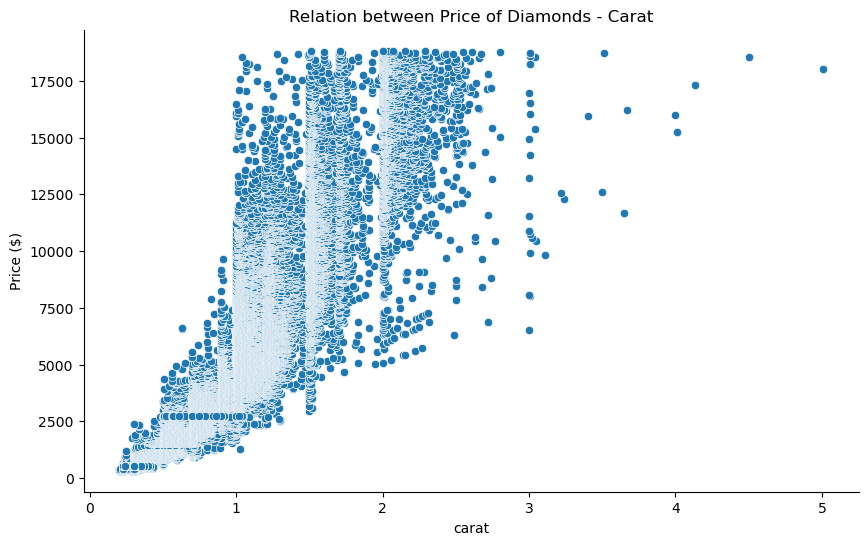

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=diamonds, x='carat', y='price')
plt.title('Relation between Price of Diamonds - Carat')
plt.ylabel('Price ($)')
sns.despine()

Looking at the previous chart, we can observe different informatio:

- **Positive correlation**: There appears to be a positive correlation between carat weight and price, suggesting that as carat weight increases, the price of the diamond generally increases as well.

- **Non-linear relationship**: The relationship between carat and price seems to be non-linear, with the price increase becoming steeper as the carat weight increases. This indicates that larger diamonds may command a premium price compared to smaller diamonds.

- **Presence of outliers**: The scatter plot may show some outliers, with a few diamonds having either unusually high or low prices compared to others with similar carat weights. These outliers may represent diamonds with exceptional characteristics, such as a unique color or exceptional clarity, that significantly impact their value.

- **Heteroscedasticity**: The scatter plot might show a fanning or cone shape, indicating that the variability in price increases as the carat weight increases. This suggests that larger diamonds may have a wider range of prices compared to smaller diamonds, possibly due to varying quality factors.

- **Clustering**: There may be some clustering or grouping of data points in specific regions of the scatter plot. This could be indicative of certain carat weight ranges that are more popular or commonly available in the market.

- **Data density**: The scatter plot may show higher data density at lower carat weights, suggesting that smaller diamonds are more common and readily available than larger diamonds. This observation aligns with the fact that larger diamonds are rarer and, as a result, more expensive.

## 2. Create a simple dummy model

Before diving into more sophisticated regression models, it's always a good idea to start with a simple baseline or dummy model. This allows us to get a sense of how well the more advanced models are performing compared to a basic, intuitive approach.

Given our exploration of the relationship between carat and price, we can come up with a simple dummy model based on a linear relationship between the two variables. For example, we can assume that the price of a diamond is roughly 4,000 times its carat weight. This would give us a simple model like:

`price = carat * 4000`

Let's start by creating the train-test split:

In [6]:
from sklearn.model_selection import train_test_split

X = diamonds[['carat']]
y = diamonds['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Now, time to create our dummy model:

In [7]:
def dummy_model(carat):
    return carat * 4000

To evaluate our dummy model, we can use the Root Mean Squared Error (RMSE) metric, which measures the difference between the true prices and our model's predictions. Scikit-learn provides the mean_squared_error function, which we can use to calculate RMSE:

In [8]:
from sklearn.metrics import mean_squared_error

y_train_pred = dummy_model(X_train['carat'])
y_test_pred = dummy_model(X_test['carat'])

train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")


Train RMSE: 2477.30
Test RMSE: 2457.55


This will output the RMSE values for both the training and test sets, giving us a baseline performance measure for our simple dummy model. 

RMSE stands for Root Mean Squared Error, and it is a commonly used metric to evaluate the performance of regression models. It calculates the square root of the average squared differences between the actual (true) values and the predicted values. Lower RMSE values indicate better model performance.

Let's create a plot that shows the actual prices, predicted prices, and the errors (differences) between them. To make it easy to visualise this differences, we are only going to take a sample of our results:

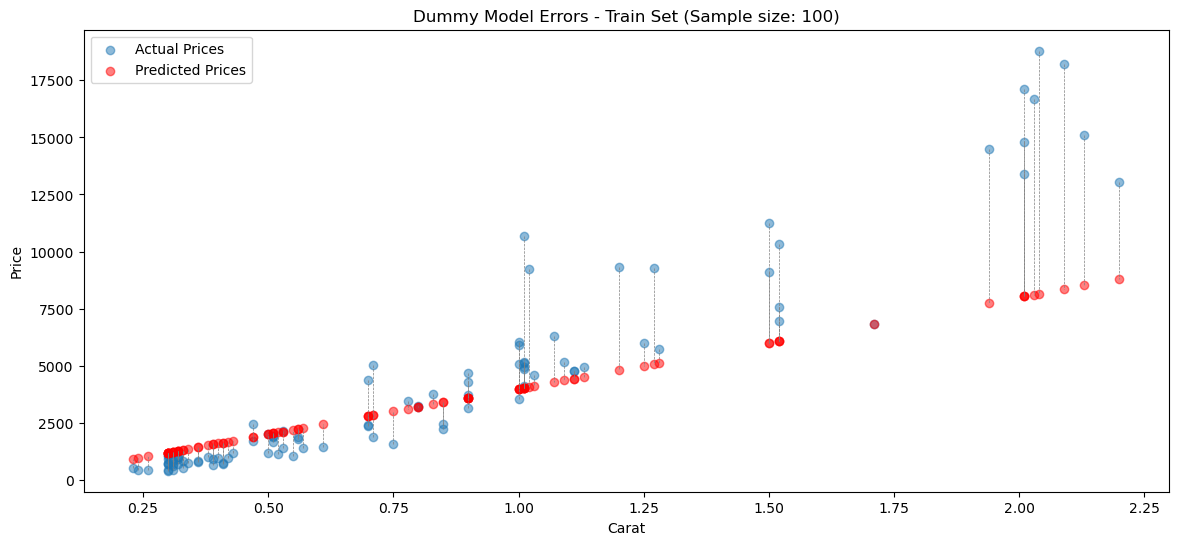

In [9]:
import matplotlib.pyplot as plt

# Function to plot errors
def plot_errors(X, y_true, y_pred, title, figsize=(10, 6), alpha=0.5, color='red', sample_size=50):
    
    # Sample data for plotting purposes
    X_train_sample = X.sample(n=sample_size, random_state=42)
    y_train_sample = y_true.loc[X_train_sample.index]
    y_train_pred_sample = y_pred.loc[X_train_sample.index]

    # Plot data
    fig, ax = plt.subplots(figsize=figsize)
    ax.scatter(X_train_sample, y_train_sample, alpha=alpha, label='Actual Prices')
    ax.scatter(X_train_sample, y_train_pred_sample, alpha=alpha, label='Predicted Prices', color=color)

    # Draw error lines
    for x, y_t, y_p in zip(X_train_sample.values.flatten(), y_train_sample, y_train_pred_sample):
        ax.plot([x, x], [y_t, y_p], color='gray', linestyle='--', linewidth=0.5)

    # Plot details
    title = title + f" (Sample size: {sample_size})"
    ax.set_title(title)
    ax.set_xlabel('Carat')
    ax.set_ylabel('Price')
    ax.legend()
    plt.show()

# Example usage
plot_errors(
    X_train, y_train, y_train_pred, 
    'Dummy Model Errors - Train Set', 
    sample_size=100,
    figsize=(14, 6)
)

The plot shows the actual prices (blue dots) and predicted prices (red dots) based on the carat values. The gray dashed lines represent the errors between the actual and predicted prices. You can observe the errors varying across the data points, and the RMSE is a summary statistic that helps quantify these errors.

In the next iteration, we'll build a linear regression model using scikit-learn and compare its performance to our dummy model.

## 3. Linear Regression

Now that we have a baseline model and a good understanding of the RMSE concept, let's move on to a more sophisticated approach: linear regression. Linear regression is a simple yet powerful machine learning technique that tries to find the best-fitting straight line through the data points. The goal of linear regression is to minimize the sum of squared errors between the actual and predicted values.

Linear regression is based on the equation:

`price = a * carat + b`

Here, `a` is the slope, which represents the relationship between the carat weight and the price, and `b` is the intercept, which is the price when the carat weight is zero. Our objective is to find the optimal values for `a` and `b` that minimize the errors between the true and predicted prices.

Let's implement a linear regression model using scikit-learn's `LinearRegression` with only the 'carat' column as the input feature:

In [10]:
from sklearn.linear_model import LinearRegression

# Create and fit the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)


Let's evaluate our linear regression model using the RMSE metric:

In [11]:
train_rmse_lr = mean_squared_error(y_train, y_train_pred_lr, squared=False)
test_rmse_lr = mean_squared_error(y_test, y_test_pred_lr, squared=False)

print(f"Linear Regression Train RMSE: {train_rmse_lr:.2f}")
print(f"Linear Regression Test RMSE: {test_rmse_lr:.2f}")


Linear Regression Train RMSE: 1548.28
Linear Regression Test RMSE: 1549.64


Is it better or worse than our dummy model?

In [12]:
print("RMSE Evolution:")
print("-" * 30)
print(f"1. Dummy Model: \n\tTrain RMSE: {train_rmse:.2f}\n\tTest RMSE: {test_rmse:.2f}")
print("-" * 30)
print(f"2. Linear Regression Model (Carat only): \n\tTrain RMSE: {train_rmse_lr:.2f}\n\tTest RMSE: {test_rmse_lr:.2f}")

RMSE Evolution:
------------------------------
1. Dummy Model: 
	Train RMSE: 2477.30
	Test RMSE: 2457.55
------------------------------
2. Linear Regression Model (Carat only): 
	Train RMSE: 1548.28
	Test RMSE: 1549.64


It has improved! Let's compare them:

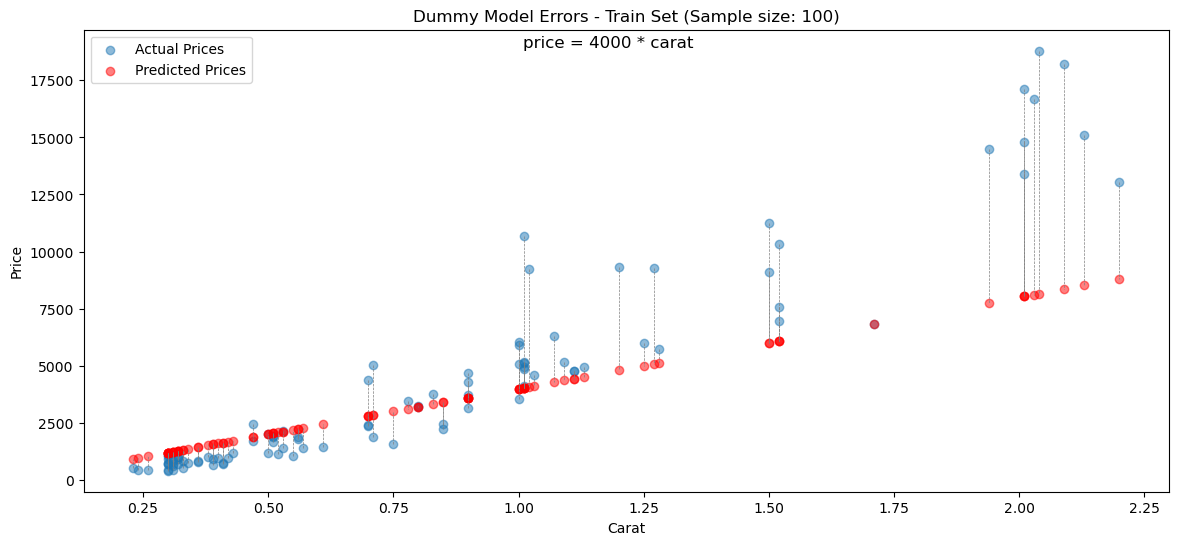

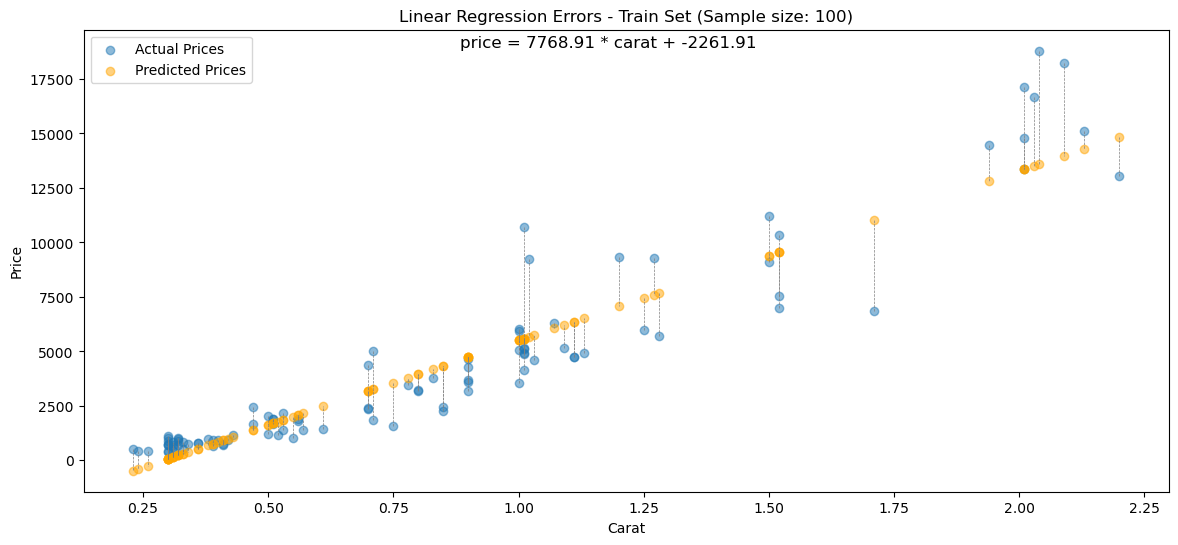

In [13]:
# compare both plots and see how the linear regression model performs better than the dummy model.
def plot_errors(X, y_true, y_pred, title, formula, figsize=(10, 6), alpha=0.5, color='red', sample_size=100):
    
    # Sample data for plotting purposes
    X_train_sample = X.sample(n=sample_size, random_state=42)
    y_train_sample = y_true.loc[X_train_sample.index]
    y_train_pred_sample = y_pred.loc[X_train_sample.index]

    # Plot data
    fig, ax = plt.subplots(figsize=figsize)
    ax.scatter(X_train_sample, y_train_sample, alpha=alpha, label='Actual Prices')
    ax.scatter(X_train_sample, y_train_pred_sample, alpha=alpha, label='Predicted Prices', color=color)

    # Draw error lines
    for x, y_t, y_p in zip(X_train_sample.values.flatten(), y_train_sample, y_train_pred_sample):
        ax.plot([x, x], [y_t, y_p], color='gray', linestyle='--', linewidth=0.5)

    # Plot details
    title = title + f" (Sample size: {sample_size})"
    ax.set_title(title)
    ax.set_xlabel('Carat')
    ax.set_ylabel('Price')
    ax.legend()
    fig.suptitle(formula, fontsize=12, y=0.87)  # Add formula as a subtitle
    plt.show()


# prepare the formula
dummy_formula = f"price = {4000:.0f} * carat"
# Plot errors for the dummy model
plot_errors(
    X_train, 
    y_train, 
    y_train_pred,
    'Dummy Model Errors - Train Set', 
    dummy_formula, 
    figsize=(14, 6), 
    sample_size=100
    )

# prepare the formula 
lr_formula = f"price = {lr.coef_[0]:.2f} * carat + {lr.intercept_:.2f}"
# prepare predictions for plotting
y_train_pred_lr = pd.Series(y_train_pred_lr)
pd.Series(y_train_pred_lr).index =  y_train.index
y_train_pred_lr
# Plot errors for the linear regression model
plot_errors(
    X_train,
    y_train, 
    y_train_pred_lr,
    'Linear Regression Errors - Train Set',
    lr_formula, 
    color='orange',
    figsize=(14, 6), 
    sample_size=100
    )

These plots display the actual prices, predicted prices, and errors for both the dummy model and the linear regression model, along with their respective formulas. 

The main takeaways when we compare this two plots can be:

- **Fitting**: The linear regression model appears to provide a better fit to the data compared to the dummy model. The predicted prices from the linear regression model follow the general trend of increasing price with increasing carat weight more closely than the dummy model.

- **Error distribution**: The errors (differences between actual and predicted prices) in the linear regression model seem to be smaller and more evenly distributed around the predicted prices, whereas the dummy model shows larger and more varied errors. This indicates that the linear regression model is better at capturing the relationship between carat and price. This is something we already detected on the RMSE statistic.

- **Model complexity**: The dummy model is a simple linear model with a fixed slope, while the linear regression model is more flexible, with its slope and intercept determined by the data. This makes the linear regression model better suited to capture the underlying relationship between carat weight and price.

- **Performance**: Based on the scatter plots, the linear regression model generally appears to perform better than the dummy model in predicting diamond prices. The predictions from the linear regression model are more closely aligned with the actual prices, suggesting that it has a higher predictive accuracy.

## 4. Improve the Model with More Features and Preprocessing

Time to improve the linear regression model by incorporating all the relevant features in the dataset and using preprocessing techniques to prepare the data for training. 

In [14]:
X_all = diamonds.drop(columns=['price'])
y_all = diamonds['price']

# Split the dataset into train and test sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42)


Create the preprocessing pipeline for our data:

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression

# Identify the numerical and categorical columns
num_cols = ['carat', 'depth', 'table', 'x', 'y', 'z']
cat_cols = ['cut', 'color', 'clarity']

# Create transformers for numerical and categorical features
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

# Create a ColumnTransformer to apply the transformers to the appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])


# Combine the preprocessor and the model into a single pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])
# Fit the pipeline to the training data
pipeline.fit(X_train_all, y_train_all)

# Make predictions
y_train_pred_all = pipeline.predict(X_train_all)
y_test_pred_all = pipeline.predict(X_test_all)

# Evaluate the model using RMSE
train_rmse_all = mean_squared_error(y_train_all, y_train_pred_all, squared=False)
test_rmse_all = mean_squared_error(y_test_all, y_test_pred_all, squared=False)

print(f"Improved Model Train RMSE: {train_rmse_all:.2f}")
print(f"Improved Model Test RMSE: {test_rmse_all:.2f}")

Improved Model Train RMSE: 1128.57
Improved Model Test RMSE: 1135.21


Is my new model better than the previous ones?

In [16]:
print("RMSE Evolution:")
print("-" * 30)
print(f"1. Dummy Model: \n\tTrain RMSE: {train_rmse:.2f}\n\tTest RMSE: {test_rmse:.2f}")
print("-" * 30)
print(f"2. Linear Regression Model (Carat only): \n\tTrain RMSE: {train_rmse_lr:.2f}\n\tTest RMSE: {test_rmse_lr:.2f}")
print("-" * 30)
print(f"3. Improved Model (All features): \n\tTrain RMSE: {train_rmse_all:.2f}\n\tTest RMSE: {test_rmse_all:.2f}")

RMSE Evolution:
------------------------------
1. Dummy Model: 
	Train RMSE: 2477.30
	Test RMSE: 2457.55
------------------------------
2. Linear Regression Model (Carat only): 
	Train RMSE: 1548.28
	Test RMSE: 1549.64
------------------------------
3. Improved Model (All features): 
	Train RMSE: 1128.57
	Test RMSE: 1135.21


## 5. Workshop summary

1. Model Evaluation and Validation:
    - This step involves assessing the performance of the models using the available data, splitting it into training and test sets, and validating the models by evaluating their performance on unseen data.

2. Review performance metrics for regression (RMSE, R-squared, etc.):
    - We have used the Root Mean Squared Error (RMSE) as a performance metric for the regression models. RMSE measures the average squared difference between the actual and predicted values, and it is a commonly used metric for regression problems. Another performance metric we could use is R-squared, which tells us the proportion of the variance in the dependent variable that is predictable from the independent variables.

3. Compare the performance of the dummy model and the two linear regression models:
    - We have built three models: a dummy model, a linear regression model using only 'carat' as a feature, and an improved linear regression model using all the features. By comparing the RMSE values, we can conclude that the improved model with all features performs better than the other two models, as it has the lowest RMSE.

### Let's talk a little bit about the assumptions, limitations, and potential improvements:

1. Assumptions:
    - Linear regression assumes a linear relationship between the dependent and independent variables.
    - The errors are assumed to be normally distributed and have constant variance (homoscedasticity) [More info to sklearn documentation](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html).

2. Limitations:
    - The model's performance may be limited by the linearity assumption if the actual relationship between the variables is non-linear.
    - The model may be sensitive to outliers, as they can greatly affect the line of best fit.
    - The model assumes that the features are independent of each other, and multicollinearity can lead to inaccurate estimates of the coefficients (We will talk about it on the next days). 

3. Potential Improvements:
    - Use non-linear models or transformations of the features to better capture the relationships between the variables.
    - Perform feature selection or dimensionality reduction to eliminate redundant features and reduce the risk of multicollinearity (We will talk about it on the next days). 
    - Regularize the model to reduce overfitting and improve generalization. More information on [sklearn documentation](https://scikit-learn.org/stable/modules/linear_model.html).
    - Conduct a more thorough hyperparameter tuning process (e.g., using Grid Search or Random Search) to find the optimal set of hyperparameters for the model.

In [ ]:
# Time to implement the potentioal improvements, like:
# use other models
# performe a feature selection after doing an exploration
# apply grid search